# Tarea 2 Reglas de Asociación

Objetivo de la tarea. Identificar reglas de asociación asociadas a ingresos altos de los hogares. Nota: Ustedes decidirán a partir de que valor se considera ingreso alto para un hogar

In [1]:
# Librerías
import pandas as pd
import numpy as np

In [2]:
# Leer los datos de Gasto
valores_missing = ['', ' ']
gasto = pd.read_csv("conjunto_de_datos_gastoshogar_enigh_2018_ns.csv", \
                    usecols= [0,1,14], na_values = valores_missing)
gasto.head()

,folioviv,foliohog,gasto
0,100013601,1,30.0
1,100013601,1,84.0
2,100013601,1,60.0
3,100013601,1,33.0
4,100013601,1,2400.0


In [3]:
gasto.shape

(1048575, 3)

In [4]:
# Colapsar la info a nivel hogar
gasto_x_hogar =gasto.groupby(['folioviv','foliohog']).agg({'gasto':['sum']})
gasto_x_hogar.head()

,,gasto
,,sum
folioviv,foliohog,
100013601,1,2607.0
100013602,1,23696.0
100013603,1,38780.0
100013604,1,7428.0
100013606,1,2547.0


In [5]:
gasto_x_hogar.shape

(44250, 1)

Definir valor para ingreso alto. Enuncia el porque de tu valor o incluye la referencia si utilizaste alguna

In [6]:
gasto_x_hogar['gasto','sum'].describe(percentiles = np.arange(0,1,.1))

count    4.425000e+04
mean     1.133672e+04
std      2.832171e+04
min      6.000000e+00
0%       6.000000e+00
10%      9.370000e+02
20%      1.703800e+03
30%      2.524700e+03
40%      3.490000e+03
50%      4.708000e+03
60%      6.416000e+03
70%      8.924000e+03
80%      1.353940e+04
90%      2.469000e+04
max      1.356871e+06
Name: (gasto, sum), dtype: float64

Considerare un ingreso alto con $7500 debido a que considerare como hogares con ingreso alto dividiendo a los ingresos por hogar entra 40% considerando la población con ingreso alto

In [7]:
imgreso_alto = 7500

In [8]:

gasto_x_hogar['ingreso_alto'] = gasto_x_hogar['gasto']['sum'].map(lambda x: x > imgreso_alto)

# Borrar la variable gasto
del gasto_x_hogar['gasto']

In [9]:
gasto_x_hogar.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44250 entries, (100013601, 1) to (1909929214, 1)
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   (ingreso_alto, )  44250 non-null  bool 
dtypes: bool(1)
memory usage: 599.6 KB


In [10]:
gasto_x_hogar.columns = ['ingreso_alto']

In [11]:
gasto_x_hogar.head(10)

,,ingreso_alto
folioviv,foliohog,
100013601,1,False
100013602,1,True
100013603,1,True
100013604,1,False
100013606,1,False
100026701,1,True
100026703,1,True
100026704,1,True
100026706,1,False


In [12]:
valores_missing = ['', ' ']
hogares = pd.read_csv("conjunto_de_datos_hogares_enigh_2018_ns.csv", \
                    index_col= [0,1], \
                    usecols= [0, 1, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, \
                              41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, \
                              77, 79, 81, 83, 85, 87, 89, 91, 93, 95], \
                      na_values = valores_missing)
hogares.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_refri,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,7,1,7,7,4,7,1,7,7,7,...,1.0,1.0,1.0,1.0,1,1.0,1,1,0,0
100013602,1,7,3,4,3,3,2,0,5,7,5,...,1.0,1.0,1.0,1.0,1,1.0,1,2,1,1
100013603,1,4,2,5,4,5,3,2,2,3,4,...,1.0,1.0,1.0,1.0,0,1.0,0,1,0,0
100013604,1,7,3,7,7,4,7,1,5,2,7,...,1.0,1.0,1.0,1.0,1,5.0,0,0,0,0
100013606,1,7,1,1,7,3,7,0,2,7,7,...,1.0,1.0,1.0,1.0,0,0.0,0,0,0,0


In [13]:
hogares.shape

(74647, 45)

In [14]:
# Transformar a valores Booleanos
hogares_bool = hogares > 0

In [15]:
union = hogares_bool.merge(gasto_x_hogar, how='left', left_index=True, right_index=True)
union.shape

(74647, 46)

In [16]:
union.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego,ingreso_alto
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
100013602,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
100013603,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,False,True,False,False,True
100013604,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
100013606,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,False,False,False,False,False,False,False


In [17]:
# Checar la cantidad de missings para la variable gasto
union.ingreso_alto.isnull().sum()

30397

In [18]:
# filtrar donde no haya missings
datos = union[union.ingreso_alto.notnull()]
datos["ingreso_alto"] = datos["ingreso_alto"].astype(bool)
datos.shape

/home/vick/virtual_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(44250, 46)

In [19]:
datos.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego,ingreso_alto
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
100013602,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
100013603,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,False,True,False,False,True
100013604,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
100013606,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,False,False,False,False,False,False,False


In [20]:
# Revisar cuantos registros tienen ingreso alto
datos.ingreso_alto.sum()

15561

In [21]:
datos_muestra = datos.sample(n=10000, random_state = 202011)

### Ejercicio 1

Experimentar con diferentes niveles de soporte, confianza y lift para encotrar reglas de asociación que les hagan sentido considerando la variable ingreso_alto como consecuente

In [22]:
# Importat las funciones a utilizar
from mlxtend.frequent_patterns import apriori, association_rules

Experimentar con distintos niveles de soporte y el máximo número elementos en los itemsets.

In [27]:
# Usar el algoritmo Apriori para obtener itemsets frecuentes
frequent_itemsets = apriori(datos, 
                            min_support =  .3, #Inserta valor 
                            max_len =  3, #Inserta valor
                            use_colnames = True,
                            low_memory = True)

In [28]:
print(frequent_itemsets.shape)
print(frequent_itemsets.head())

(2736, 2)
    support    itemsets
0  0.995458  (alim17_1)
1  0.836565  (alim17_2)
2  0.943119  (alim17_3)
3  0.895706  (alim17_4)
4  0.925605  (alim17_5)


In [29]:
frequent_itemsets[frequent_itemsets['itemsets']=={'ingreso_alto'}]

,support,itemsets
26,0.351661,(ingreso_alto)


Experimentar con distintos valores (pueden variar la métrica si lo consideran adecuado)

In [53]:
# Generar reglas de asociación con un nivel mínimo de confianza
rules = association_rules(frequent_itemsets, 
                          metric = 'support', 
                          min_threshold = .32) # Inserta valor


In [54]:
print(rules.shape)
print(rules.head())

(14046, 9)
  antecedents consequents  antecedent support  consequent support   support  \
0  (alim17_1)  (alim17_2)            0.995458            0.836565  0.835096   
1  (alim17_2)  (alim17_1)            0.836565            0.995458  0.835096   
2  (alim17_1)  (alim17_3)            0.995458            0.943119  0.940972   
3  (alim17_3)  (alim17_1)            0.943119            0.995458  0.940972   
4  (alim17_1)  (alim17_4)            0.995458            0.895706  0.893401   

   confidence      lift  leverage  conviction  
0    0.838907  1.002799  0.002331    1.014536  
1    0.998244  1.002799  0.002331    2.586916  
2    0.945265  1.002276  0.002137    1.039223  
3    0.997724  1.002276  0.002137    1.995440  
4    0.897478  1.001978  0.001764    1.017280  


In [55]:
rules_income_consecuent = rules[rules['consequents'] == {'ingreso_alto'}]
rules_income_consecuent.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50,(alim17_1),(ingreso_alto),0.995458,0.351661,0.349582,0.351177,0.998624,-0.000482,0.999254
143,(alim17_3),(ingreso_alto),0.943119,0.351661,0.340746,0.361297,1.027401,0.009088,1.015087
187,(alim17_4),(ingreso_alto),0.895706,0.351661,0.331390,0.369976,1.052081,0.016405,1.029070
230,(alim17_5),(ingreso_alto),0.925605,0.351661,0.340384,0.367743,1.045730,0.014885,1.025435
272,(alim17_6),(ingreso_alto),0.943910,0.351661,0.335367,0.355296,1.010336,0.003431,1.005638


In [56]:
rules_income_consecuent.shape

(120, 9)

In [57]:
# Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

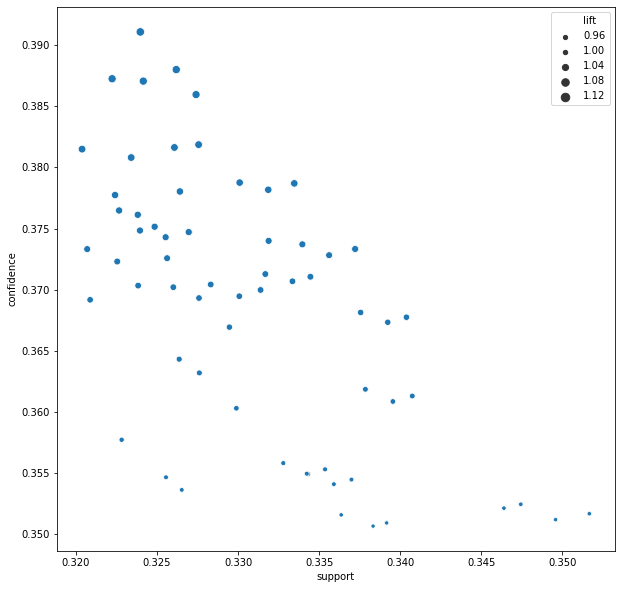

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules_income_consecuent)

plt.show()

Experimentar con distintos niveles de de soporte, confianza y lift

In [77]:
filtered_rules = rules_income_consecuent[(rules_income_consecuent['support'] > .35) &  # Modifca el valor
                (rules_income_consecuent['confidence'] > .35) & # Modifica el valor
                (rules_income_consecuent['lift'] >= 1)] # Modifica el valor

In [78]:
print(filtered_rules.shape)

(10, 9)


In [83]:
print(filtered_rules)

                  antecedents     consequents  antecedent support  \
498                (telefono)  (ingreso_alto)                 1.0   
524                 (celular)  (ingreso_alto)                 1.0   
548                 (tv_paga)  (ingreso_alto)                 1.0   
570              (conex_inte)  (ingreso_alto)                 1.0   
12546     (celular, telefono)  (ingreso_alto)                 1.0   
12618     (tv_paga, telefono)  (ingreso_alto)                 1.0   
12684  (conex_inte, telefono)  (ingreso_alto)                 1.0   
12966      (celular, tv_paga)  (ingreso_alto)                 1.0   
13032   (celular, conex_inte)  (ingreso_alto)                 1.0   
13308   (tv_paga, conex_inte)  (ingreso_alto)                 1.0   

       consequent support   support  confidence  lift  leverage  conviction  
498              0.351661  0.351661    0.351661   1.0       0.0         1.0  
524              0.351661  0.351661    0.351661   1.0       0.0         1.0  
548   

In [80]:
rules_income_consecuent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50,(alim17_1),(ingreso_alto),0.995458,0.351661,0.349582,0.351177,0.998624,-0.000482,0.999254
143,(alim17_3),(ingreso_alto),0.943119,0.351661,0.340746,0.361297,1.027401,0.009088,1.015087
187,(alim17_4),(ingreso_alto),0.895706,0.351661,0.331390,0.369976,1.052081,0.016405,1.029070
230,(alim17_5),(ingreso_alto),0.925605,0.351661,0.340384,0.367743,1.045730,0.014885,1.025435
272,(alim17_6),(ingreso_alto),0.943910,0.351661,0.335367,0.355296,1.010336,0.003431,1.005638
...,...,...,...,...,...,...,...,...,...
13500,"(tv_paga, num_estuf)",(ingreso_alto),0.903277,0.351661,0.337220,0.373330,1.061619,0.019573,1.034578
13632,"(num_licua, conex_inte)",(ingreso_alto),0.872565,0.351661,0.326960,0.374712,1.065549,0.020113,1.036864
13686,"(conex_inte, num_refri)",(ingreso_alto),0.880565,0.351661,0.333469,0.378699,1.076886,0.023809,1.043518
13710,"(conex_inte, num_estuf)",(ingreso_alto),0.903277,0.351661,0.337220,0.373330,1.061619,0.019573,1.034578


### Describir hallazgos

Podemos encontrar a partir de la información que no hay una varible que marque mucho el ingreso alto pero las principales debido a su soporte y a la mayor confianza estarian:
* telefono
* celular
* tv_paga
* conex_inte

## Ejercicio 2

Calcular la métrica de Zhang a la tabla rules_income_consecuent

In [86]:
frequent_itemsets[frequent_itemsets['itemsets']=={'ingreso_alto'}]

,support,itemsets
26,0.351661,(ingreso_alto)


In [89]:
soporte_b = frequent_itemsets[frequent_itemsets['itemsets']=={'ingreso_alto'}]['support']

In [90]:
soporte_b

26    0.351661
Name: support, dtype: float64

In [85]:
rules_income_consecuent['antecedents']

50                    (alim17_1)
143                   (alim17_3)
187                   (alim17_4)
230                   (alim17_5)
272                   (alim17_6)
                  ...           
13500       (tv_paga, num_estuf)
13632    (num_licua, conex_inte)
13686    (conex_inte, num_refri)
13710    (conex_inte, num_estuf)
13998     (num_estuf, num_refri)
Name: antecedents, Length: 120, dtype: object

In [92]:
rules_income_consecuent['antecedent support']

50       0.995458
143      0.943119
187      0.895706
230      0.925605
272      0.943910
           ...   
13500    0.903277
13632    0.872565
13686    0.880565
13710    0.903277
13998    0.840678
Name: antecedent support, Length: 120, dtype: float64

In [108]:
rules_income_consecuent['zhang'] = (rules_income_consecuent['support'] - rules_income_consecuent['antecedent support']*rules_income_consecuent['consequent support'])/[max([x,y]) for x,y in zip(rules_income_consecuent['support']*(1-rules_income_consecuent['antecedent support']),rules_income_consecuent['antecedent support']*rules_income_consecuent['consequent support']-rules_income_consecuent['support'])]

/home/vick/virtual_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
rules_income_consecuent = rules_income_consecuent.dropna()

In [115]:
rules_income_consecuent.sort_values(by=['zhang']).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
50,(alim17_1),(ingreso_alto),0.995458,0.351661,0.349582,0.351177,0.998624,-0.000482,0.999254,-0.303364
2196,"(alim17_1, conex_inte)",(ingreso_alto),0.995458,0.351661,0.349582,0.351177,0.998624,-0.000482,0.999254,-0.303364
2130,"(alim17_1, tv_paga)",(ingreso_alto),0.995458,0.351661,0.349582,0.351177,0.998624,-0.000482,0.999254,-0.303364
2058,"(alim17_1, celular)",(ingreso_alto),0.995458,0.351661,0.349582,0.351177,0.998624,-0.000482,0.999254,-0.303364
1980,"(alim17_1, telefono)",(ingreso_alto),0.995458,0.351661,0.349582,0.351177,0.998624,-0.000482,0.999254,-0.303364


In [116]:
rules_income_consecuent.sort_values(by=['zhang']).tail(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
13710,"(conex_inte, num_estuf)",(ingreso_alto),0.903277,0.351661,0.33722,0.37333,1.061619,0.019573,1.034578,0.600088
12876,"(num_estuf, telefono)",(ingreso_alto),0.903277,0.351661,0.33722,0.37333,1.061619,0.019573,1.034578,0.600088
634,(num_estuf),(ingreso_alto),0.903277,0.351661,0.33722,0.37333,1.061619,0.019573,1.034578,0.600088
13224,"(celular, num_estuf)",(ingreso_alto),0.903277,0.351661,0.33722,0.37333,1.061619,0.019573,1.034578,0.600088
13500,"(tv_paga, num_estuf)",(ingreso_alto),0.903277,0.351661,0.33722,0.37333,1.061619,0.019573,1.034578,0.600088


Al aplicar esta medida encontramos que los antecedentes posiitivos soon conexion a internet, numero de estufas y 